In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ballchallenge.label_generation import generate_smooth_labels

In [2]:
probability_maps = generate_smooth_labels(
    target_points=[(1, 1)],
    target_std=0.3,
    x_value_range=(0, 2),
    y_value_range=(0, 2),
    grid_size=(40, 40),
)

Text(70.72222222222221, 0.5, 'Y Position')

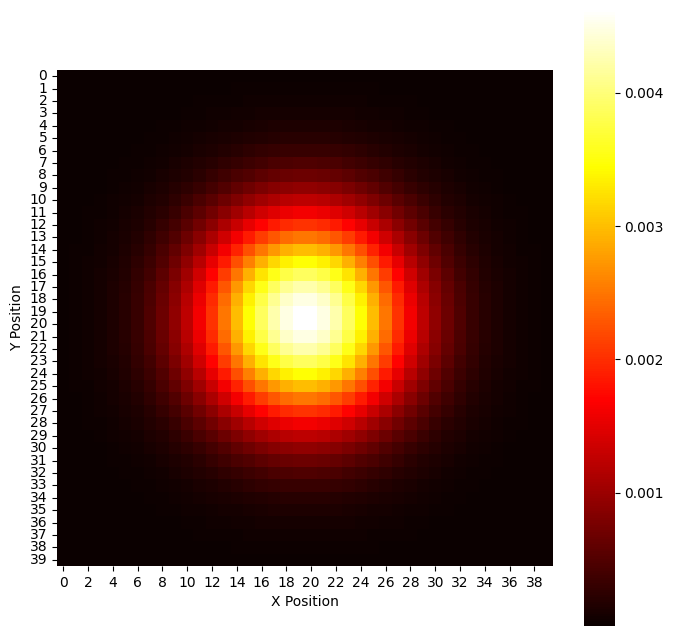

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(probability_maps[0], square=True, cmap="hot", ax=ax)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")